In [2]:
#importing pandas and reading csv file.
import pandas as pd

df = pd.read_csv('hogwarts_legacy_reviews.csv')

print(df.shape)

(46405, 4)


In [3]:
df.head()

,Unnamed: 0,Playtime,Feedback,Review
0,0,16,Positive,Greattt Game!
1,1,26,Positive,9/10Fantastic experience. A true Wizarding Wor...
2,2,29,Positive,worth it
3,3,24,Positive,I've been waiting 84 YEARSSSSSSSS.The game is ...
4,4,7,Positive,very fun game (it is not transphobic at all)


In [4]:
#check class imbalance

df.Feedback.value_counts()

Feedback
Positive    42801
Negative     3604
Name: count, dtype: int64

In [5]:
#since there is class imbalance we need to have these categorical values equal.

#this is done using sampling

min_samples = 3604

df_positive = df[df.Feedback=="Positive"].sample(min_samples, random_state=2024)
df_negative = df[df.Feedback=="Negative"].sample(min_samples, random_state=2024)

In [6]:
#concat
df_balanced = pd.concat([df_positive,df_negative])

In [10]:
#count each categorical value
df_balanced.Feedback.value_counts()

Feedback
Positive    3604
Negative    3604
Name: count, dtype: int64

In [11]:
#Convert feedback column to num

df_balanced['Feedback_num'] = df_balanced['Feedback'].map({
    'Positive' : 0,
    'Negative' : 1
})

In [12]:
#print top 5 values

df_balanced.head()

,Unnamed: 0,Playtime,Feedback,Review,Feedback_num
11900,11900,3,Positive,Awesome game,0
17169,17169,18,Positive,Revealio simulator.,0
6785,6785,5,Positive,too easy to combo people tbh,0
7831,7831,35,Positive,Can't upskirt with leviosa... refunded...,0
17685,17685,23,Positive,avada kedavra everything in sight 10/10,0


In [16]:
df_balanced['Review'][7831]

"Can't upskirt with leviosa... refunded..."

In [18]:
#training model without preprocessed text review

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(
    df_balanced.Review,
    df_balanced.Feedback_num,
    test_size=0.2,
    random_state = 2024,
    stratify = df_balanced.Feedback_num

)

In [19]:
X_train.shape

(5766,)

In [20]:
X_test.shape

(1442,)

In [25]:
#KNN Classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
clf = Pipeline([
     ('vectorizer_tfidf',TfidfVectorizer(decode_error='replace', encoding='utf-8')),    
     ('KNN', KNeighborsClassifier())         
])


clf.fit(X_train.values.astype('U'), y_train)



y_pred = clf.predict(X_test.values.astype('U'))



print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.47      0.63       721
           1       0.65      0.98      0.78       721

    accuracy                           0.72      1442
   macro avg       0.80      0.72      0.70      1442
weighted avg       0.80      0.72      0.70      1442



In [26]:
#KNN Classifier accuracy 72%

In [34]:
from sklearn.ensemble import RandomForestClassifier
clf = Pipeline([
     ('td-idf',TfidfVectorizer(decode_error='replace', encoding='utf-8')),       
     ('Random Forest', RandomForestClassifier())         
])

#2. fit with X_train and y_train
clf.fit(X_train.values.astype('U'), y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(X_test.values.astype('U'))


#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.87      0.89       721
           1       0.87      0.91      0.89       721

    accuracy                           0.89      1442
   macro avg       0.89      0.89      0.89      1442
weighted avg       0.89      0.89      0.89      1442



In [33]:
from sklearn.naive_bayes import MultinomialNB
clf = Pipeline([
     ('count_vectorizer',TfidfVectorizer(decode_error='replace', encoding='utf-8')),       
     ('Random Forest', MultinomialNB())         
])

#2. fit with X_train and y_train
clf.fit(X_train.values.astype('U'), y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(X_test.values.astype('U'))


#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.73      0.83       721
           1       0.78      0.97      0.87       721

    accuracy                           0.85      1442
   macro avg       0.87      0.85      0.85      1442
weighted avg       0.87      0.85      0.85      1442



In [35]:
#Here we observe that Random Forest with TD-IDF is the best option for our dataset.

In [36]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[625,  96],
       [ 65, 656]], dtype=int64)

Text(95.72222222222221, 0.5, 'Truth')

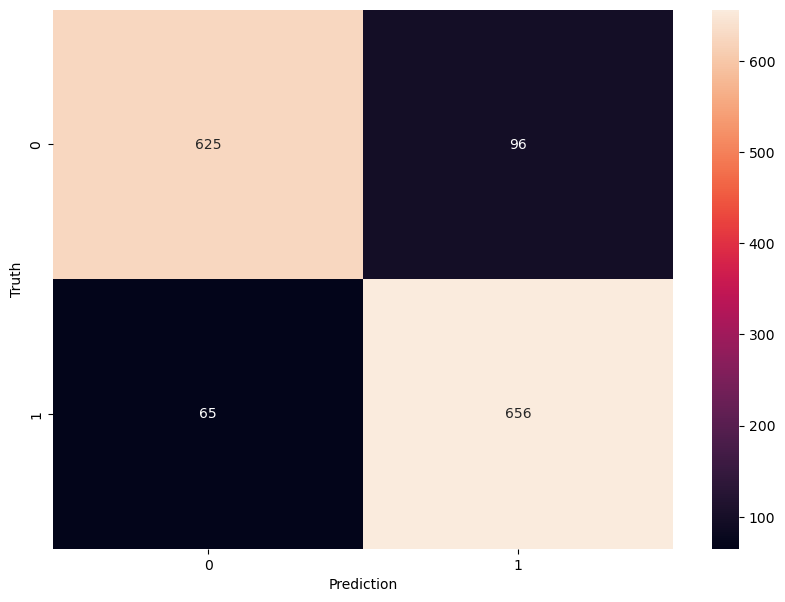

In [37]:
from matplotlib import pyplot as plt
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')

In [39]:
#Let's try preprocessing the text and check if the accuracy increases with preprocessed_text

df_balanced['Review'][7831]

"Can't upskirt with leviosa... refunded..."

In [44]:
import re

#Here we use regex to remove unwanted punct, special characters etc.

def preprocess(text):
    text = re.sub(r'[^\w\s\']',' ', str(text))
    text = re.sub(' +', ' ', str(text))
    return text.strip().lower() 

In [45]:
preprocess(df_balanced['Review'][17685])

'avada kedavra everything in sight 10 10'

In [46]:
df_balanced['Review'] = df_balanced['Review'].map(preprocess)
df.head()

,Unnamed: 0,Playtime,Feedback,Review
0,0,16,Positive,Greattt Game!
1,1,26,Positive,9/10Fantastic experience. A true Wizarding Wor...
2,2,29,Positive,worth it
3,3,24,Positive,I've been waiting 84 YEARSSSSSSSS.The game is ...
4,4,7,Positive,very fun game (it is not transphobic at all)


In [47]:
#training model with preprocessed text review

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(
    df_balanced.Review,
    df_balanced.Feedback_num,
    test_size=0.2,
    random_state = 2024,
    stratify = df_balanced.Feedback_num

)

In [48]:
#KNN Classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
clf = Pipeline([
     ('vectorizer_tfidf',TfidfVectorizer(decode_error='replace', encoding='utf-8')),    
     ('KNN', KNeighborsClassifier())         
])


clf.fit(X_train.values.astype('U'), y_train)



y_pred = clf.predict(X_test.values.astype('U'))



print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.47      0.63       721
           1       0.65      0.98      0.78       721

    accuracy                           0.72      1442
   macro avg       0.80      0.72      0.70      1442
weighted avg       0.80      0.72      0.70      1442



In [49]:
from sklearn.ensemble import RandomForestClassifier
clf = Pipeline([
     ('td-idf',TfidfVectorizer(decode_error='replace', encoding='utf-8')),       
     ('Random Forest', RandomForestClassifier())         
])

#2. fit with X_train and y_train
clf.fit(X_train.values.astype('U'), y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(X_test.values.astype('U'))


#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.88      0.90       721
           1       0.89      0.91      0.90       721

    accuracy                           0.90      1442
   macro avg       0.90      0.90      0.90      1442
weighted avg       0.90      0.90      0.90      1442



In [50]:
from sklearn.naive_bayes import MultinomialNB
clf = Pipeline([
     ('count_vectorizer',TfidfVectorizer(decode_error='replace', encoding='utf-8')),       
     ('Random Forest', MultinomialNB())         
])

#2. fit with X_train and y_train
clf.fit(X_train.values.astype('U'), y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(X_test.values.astype('U'))


#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.73      0.83       721
           1       0.78      0.97      0.87       721

    accuracy                           0.85      1442
   macro avg       0.87      0.85      0.85      1442
weighted avg       0.87      0.85      0.85      1442



In [51]:
#with countvectorizer

In [52]:
from sklearn.feature_extraction.text import CountVectorizer

In [55]:
#KNN Classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
clf = Pipeline([
     ('vectorizer_tfidf',CountVectorizer()),    
     ('KNN', KNeighborsClassifier())         
])


clf.fit(X_train.values.astype('U'), y_train)



y_pred = clf.predict(X_test.values.astype('U'))



print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.68      0.89      0.77       721
           1       0.84      0.58      0.68       721

    accuracy                           0.73      1442
   macro avg       0.76      0.73      0.73      1442
weighted avg       0.76      0.73      0.73      1442



In [56]:
from sklearn.ensemble import RandomForestClassifier
clf = Pipeline([
     ('td-idf',CountVectorizer()),       
     ('Random Forest', RandomForestClassifier())         
])

#2. fit with X_train and y_train
clf.fit(X_train.values.astype('U'), y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(X_test.values.astype('U'))


#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.85      0.88       721
           1       0.86      0.91      0.88       721

    accuracy                           0.88      1442
   macro avg       0.88      0.88      0.88      1442
weighted avg       0.88      0.88      0.88      1442



In [57]:
from sklearn.naive_bayes import MultinomialNB
clf = Pipeline([
     ('count_vectorizer',CountVectorizer()),       
     ('Random Forest', MultinomialNB())         
])

#2. fit with X_train and y_train
clf.fit(X_train.values.astype('U'), y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(X_test.values.astype('U'))


#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.75      0.84       721
           1       0.79      0.96      0.87       721

    accuracy                           0.86      1442
   macro avg       0.87      0.86      0.86      1442
weighted avg       0.87      0.86      0.86      1442



In [ ]:
#final observatio

#In tf-idf without preprocessed text, we found out that Random Forest is the best performer while KNN is the worst.

#With preprocessed text, Random Forest improved by 1% accuracy.

#However in count vectorizer Random Forest accuracy was down by 2% whereas the accuracy of both KNN and MultinomialNB improved by 1%